In [1]:
import time
import numpy as np

## Feature Extraction - Raw

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
start = time.time()

raw_feature = x_train.reshape(60000, 784)
raw_label = y_train

end = time.time()
end - start

0.0

In [6]:
raw_feature.shape

(60000, 784)

## Mean & Covariance Computation

In [84]:
features = raw_feature
labels = raw_label

features.shape, labels.shape

((60000, 784), (60000,))

In [85]:
num_sample=features.shape[0]
num_feature=features.shape[1]

### global mean of features 
over all samples  
µG - 784*1  

In [86]:
mean_global = np.mean(features, axis=0)

In [87]:
features.shape

(60000, 784)

### class-means   
µc - 784*10

In [88]:
features_classified=[]

for c in range(10):
    sample_order = np.where(labels == c)[0]
    features_single_class = np.zeros((len(sample_order), num_feature))
    for i in range(len(sample_order)):
        features_single_class[i] = features[sample_order[i]]
    features_classified.append(features_single_class)

In [89]:
mean_class = np.zeros((num_feature, 10))
mean_class_transpose = mean_class.T

for c in range(10):
    means_single_class = np.mean(features_classified[c], axis=0)
    mean_class_transpose[c] = means_single_class

mean_class=mean_class_transpose.T

In [90]:
mean_class.shape

(784, 10)

###  closeness to equal-norms of class-means

In [93]:
norm2 = np.ones(10)

for c in range(10):
    mean_single_class = mean_class[:,c]
    mean_diff = mean_single_class - mean_global
    norm2[c] = np.linalg.norm(mean_diff, ord=2, keepdims=True)

std_class_norm2 = np.std(norm2)
mean_class_norm2 = np.mean(norm2)
closeness_equal_norms_class_mean = std_class_norm2/mean_class_norm2

In [94]:
std_class_norm2, mean_class_norm2, closeness_equal_norms_class_mean

(176.8008639184426, 818.8628415948207, 0.21591022932986492)

## Visualize

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 
import matplotlib.pyplot as plt
import matplotlib

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA of Raw

In [9]:
start = time.time()

raw_pca_embedded = PCA(n_components=2).fit_transform(raw_feature)  
raw_pca_embedded.shape

end = time.time()
end - start

1.371394395828247

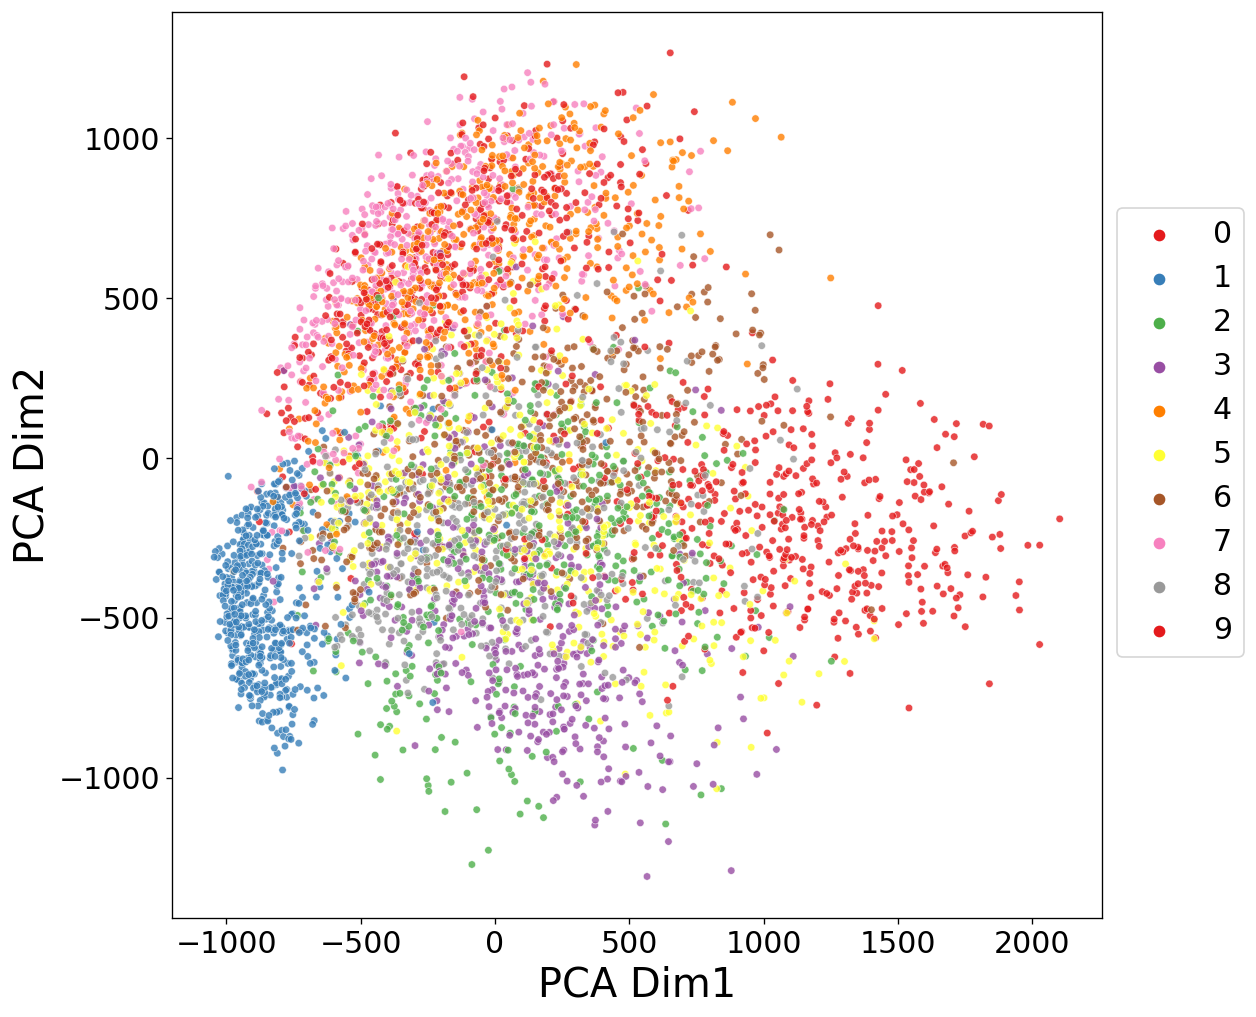

In [10]:
raw_pca_embedded_df = pd.DataFrame(raw_pca_embedded,index=raw_label)
raw_pca_embedded_df = raw_pca_embedded_df.reset_index()
raw_pca_embedded_df['index'] = raw_pca_embedded_df['index'].astype(int)
raw_pca_embedded_df_plot = raw_pca_embedded_df.loc[range(5000),:]
raw_pca_embedded_df_plot.columns = ['Label','PCA Dim1', 'PCA Dim2']
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='PCA Dim1', y='PCA Dim2',hue='Label',data=raw_pca_embedded_df_plot,
                     palette='Set1',alpha=0.8,s=20,legend='full') # tab10  Set1  husl 
ax.set_xlabel('PCA Dim1', fontsize=24)
ax.set_ylabel('PCA Dim2', fontsize=24)
ax.tick_params(labelsize=18)
legend = plt.legend(bbox_to_anchor=(1, 0.8),fontsize='18')
plt.show()

### tSNE of Raw
t-SNE(t-distributed stochastic neighbor embedding)

In [82]:
start = time.time()

raw_tsne_embedded = TSNE(n_components=2).fit_transform(raw_feature)

end = time.time()
end - start

4416.843045473099

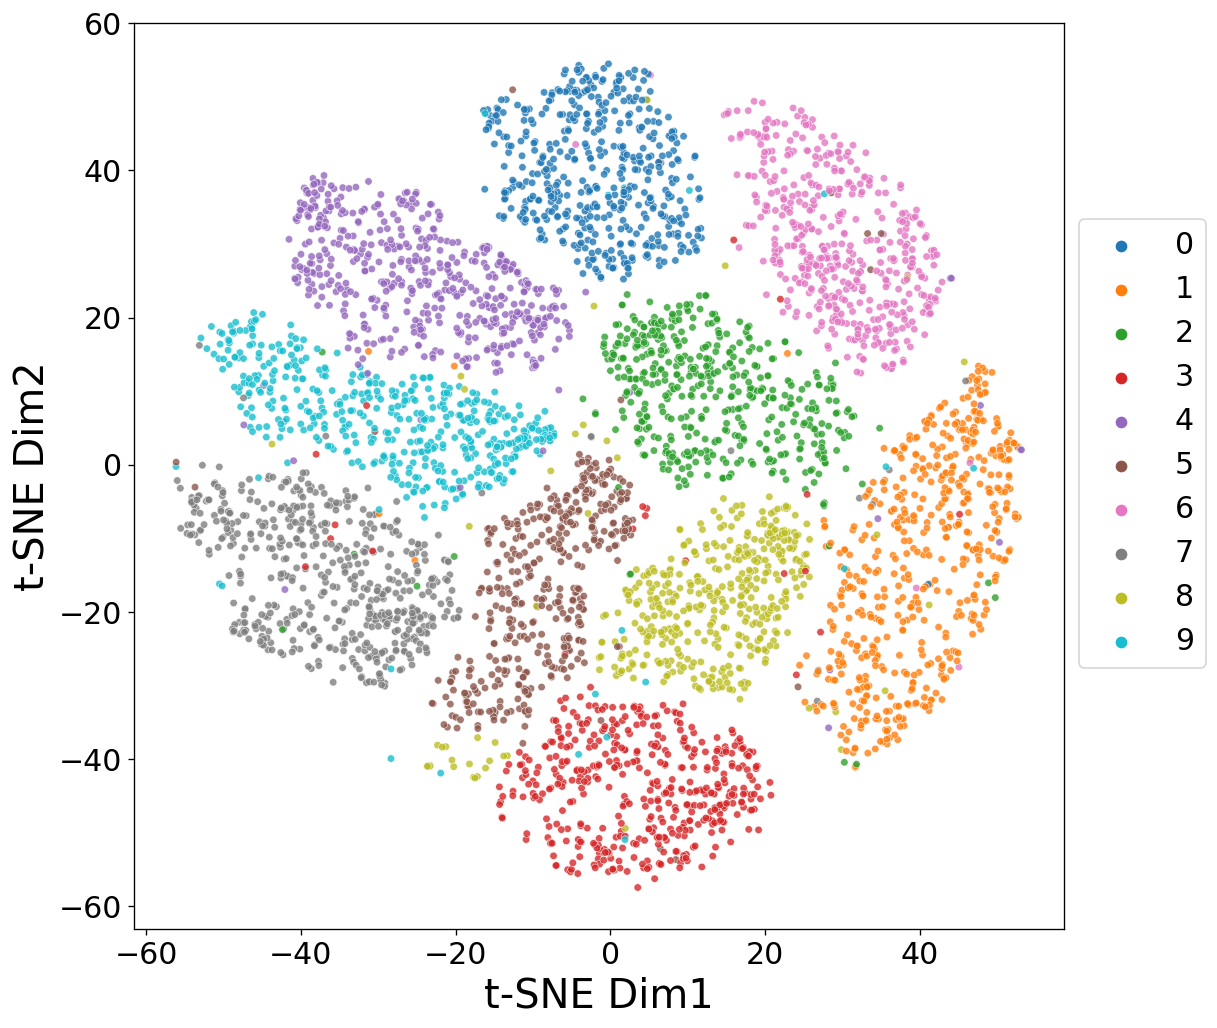

In [83]:
raw_tsne_embedded_df = pd.DataFrame(raw_tsne_embedded,index=raw_label)
raw_tsne_embedded_df = raw_tsne_embedded_df.reset_index()
raw_tsne_embedded_df['index'] = raw_tsne_embedded_df['index'].astype(int)
raw_tsne_embedded_df_plot = raw_tsne_embedded_df.loc[range(5000),:]
raw_tsne_embedded_df_plot.columns = ['Label','tSNE Dim1', 'tSNE Dim2']
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='tSNE Dim1', y='tSNE Dim2',hue='Label',data=raw_tsne_embedded_df_plot,
                     palette='tab10',alpha=0.8,s=20,legend='full')
ax.set_xlabel('t-SNE Dim1', fontsize=24)
ax.set_ylabel('t-SNE Dim2', fontsize=24)
ax.tick_params(labelsize=18)
legend = plt.legend(bbox_to_anchor=(1, 0.8),fontsize='18')
plt.show()

### Classifications based on features extracted by raw data

In [11]:
from sklearn.model_selection import cross_validate

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start = time.time()

lda = LinearDiscriminantAnalysis()

lda_results = cross_validate(lda, raw_feature[:10000], raw_label[:10000], cv=3, scoring='accuracy')
lda_results = lda_results['test_score']

end = time.time()
end - start, lda_results

(3.3163459300994873, array([0.83893221, 0.85538554, 0.84158416]))

In [76]:
from sklearn.linear_model import LogisticRegression

start = time.time()

logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

logistic_regression_results = cross_validate(logistic_regression, raw_feature[:10000], raw_label[:10000], cv=3, scoring='accuracy')
logistic_regression_results = logistic_regression_results['test_score']

end = time.time()
end - start, logistic_regression_results

d:\program\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\program\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extr

(2.9178411960601807, array([0.86742651, 0.88208821, 0.86048605]))

In [77]:
from sklearn import svm

start = time.time()

linear_svc = svm.LinearSVC()

svm_results = cross_validate(linear_svc, raw_feature[:10000], raw_label[:10000], cv=3, scoring='accuracy')
svm_results = svm_results['test_score']

end = time.time()
end - start, svm_results

d:\program\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\program\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\program\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(8.288727521896362, array([0.84223155, 0.85868587, 0.83348335]))

In [78]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

random_forest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

random_forest_results = cross_validate(random_forest, raw_feature[:10000], raw_label[:10000], cv=3, scoring='accuracy')
random_forest_results = random_forest_results['test_score']

end = time.time()
end - start, random_forest_results

(0.8228931427001953, array([0.9010198 , 0.90759076, 0.88718872]))

In [79]:
lda_results,logistic_regression_results,svm_results,random_forest_results

(array([0.83893221, 0.85538554, 0.84158416]),
 array([0.86742651, 0.88208821, 0.86048605]),
 array([0.84223155, 0.85868587, 0.83348335]),
 array([0.9010198 , 0.90759076, 0.88718872]))

In [80]:
lda_results.mean(),logistic_regression_results.mean(),svm_results.mean(),random_forest_results.mean()

(0.8453006368423285,
 0.8700002573742678,
 0.8448002568703181,
 0.8985997579961955)

In [81]:
lda_results.std(),logistic_regression_results.std(),svm_results.std(),random_forest_results.std()

(0.007212818902554427,
 0.009004867018304621,
 0.010447980148899918,
 0.008503068043343179)